In [30]:
import pandas as pd 
import networkx as nx 
from tqdm import tqdm 


In [31]:
#Observing the mapping as a DiGraph
G = nx.DiGraph()

df = pd.read_csv("data_with_topics_cleaned.csv")

graph = {}

In [32]:
for i in range(len(df)):
    source = df.iloc[i]['From']
    target = df.iloc[i]['To']
    weight = df.iloc[i]['Polarity']
    if source not in graph:
        graph[source] = {target: weight}

    else:
        if target not in graph[source]:
            graph[source][target] = weight
        else:
            graph[source][target] = (weight + graph[source][target])/2

for i in graph: 
    for j in graph[i]:
        G.add_edge(i,j,weight = graph[i][j])

In [33]:
degree_centrality = nx.degree_centrality(G)

In [34]:
Keymax = max(zip(degree_centrality.values(), degree_centrality.keys()))[1]
print(Keymax)
print(degree_centrality[Keymax])

jeff.dasovich@enron.com
0.034510096534999764


In [44]:
eigen_centrality = nx.eigenvector_centrality(G)
print(Keymax)
print(eigen_centrality[Keymax])

jeff.dasovich@enron.com
0.09243828479840734


In [36]:
# Taking net of sentiment From-To

graph2 = {'Node1': [], 'Node2': [], 'Weight': []}
for i in graph:
    for j in graph[i]:
        if j in graph:
            if i in graph[j]:
                graph2["Node1"].append(i)
                graph2["Node2"].append(j)
                graph2["Weight"].append((graph[i][j]+graph[j][i])/2)
            else:
                graph2["Node1"].append(i)
                graph2["Node2"].append(j)
                graph2["Weight"].append(abs(graph[i][j]))

In [37]:
G2 = nx.Graph()

for i in range(len(graph2['Node1'])):
    G2.add_edge(graph2['Node1'][i],graph2['Node2'][i],weight = graph2['Weight'][i])


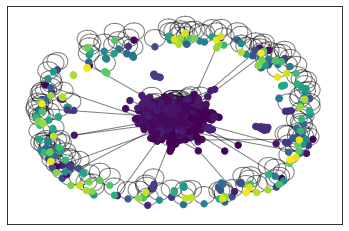

In [38]:
import networkx.algorithms.community as nx_comm
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm


partition = community_louvain.best_partition(G2, weight = "None")
# draw the graph
pos = nx.spring_layout(G2)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G2, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G2, pos, alpha=0.5)
plt.show()

In [39]:
df = pd.DataFrame(graph2)
df.sort_values('Weight', inplace = True, ascending = False)

In [40]:
# See the top 100 email interactions
df = df[:100]

In [41]:
print(df)

                                         Node1                       Node2  \
8086                    david.fisher@enron.com       andy.zipper@enron.com   
2225                       lysa.akin@enron.com     miyung.buster@enron.com   
4580                         truorange@aol.com           truorange@aol.com   
3754                        whitney@thelaw.net   sara.shackleton@enron.com   
8255                       gasmart@gasmart.com      lindy.donoho@enron.com   
...                                        ...                         ...   
8281                     rdezenzo@quallaby.com    mark.greenberg@enron.com   
5527                      soma.ghosh@enron.com  william.bradford@enron.com   
10904  1.14166227.-1@multexinvestornetwork.com     chris.dorland@enron.com   
6252                    lindy.donoho@enron.com      paul.y'barbo@enron.com   
6913                   terence.thorn@enron.com   rick.bergsieker@enron.com   

         Weight  
8086   1.000000  
2225   1.000000  
4580   0.

In [42]:
G3 = nx.Graph()
for i in range(len(df)):
    G3.add_edge(df.iloc[i]['Node1'], df.iloc[i]['Node2'])

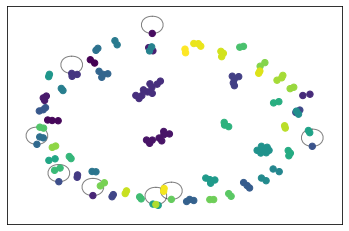

In [43]:
partition = community_louvain.best_partition(G3, weight = "None")
# draw the graph
pos = nx.spring_layout(G3)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G3, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G3, pos, alpha=0.5)
plt.show()